In [13]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits
import os
import matplotlib.animation as animation
from IPython.display import HTML

In [14]:
## color model

### START CODE HERE ###
# Function to display channels
def display_channels(image, title):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Original image
    axs[0].imshow(image)
    axs[0].set_title(title[0])
    axs[0].axis('off')

    # Display each channel
    for i in range(3):
      axs[i+1].imshow(image[:, :, i], cmap = "gray")
      axs[i+1].set_title(title[i+1])
      axs[i+1].axis('off')

# Load image
image_path = '/content/babythreeAndKimmon.jpg'
image = cv2.imread(image_path)
title_label = [["RGB", "R", "G", "B"],
                   ["HSV", "H", "S", "V"],
                   ["HSL", "H", "S", "L"],
                   ["YCrCb", "Y", "Cr", "Cb"]]

# Convert BGR to RGB for display
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_channels(img, title_label[0])

# HSV channels
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
display_channels(hsv_img, title_label[1])

# HLS channels
hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
display_channels(hls_img, title_label[2])

# YCrCb channels
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
display_channels(ycrcb_img, title_label[3])

plt.show()
### END CODE HERE ###


Output hidden; open in https://colab.research.google.com to view.

3
21


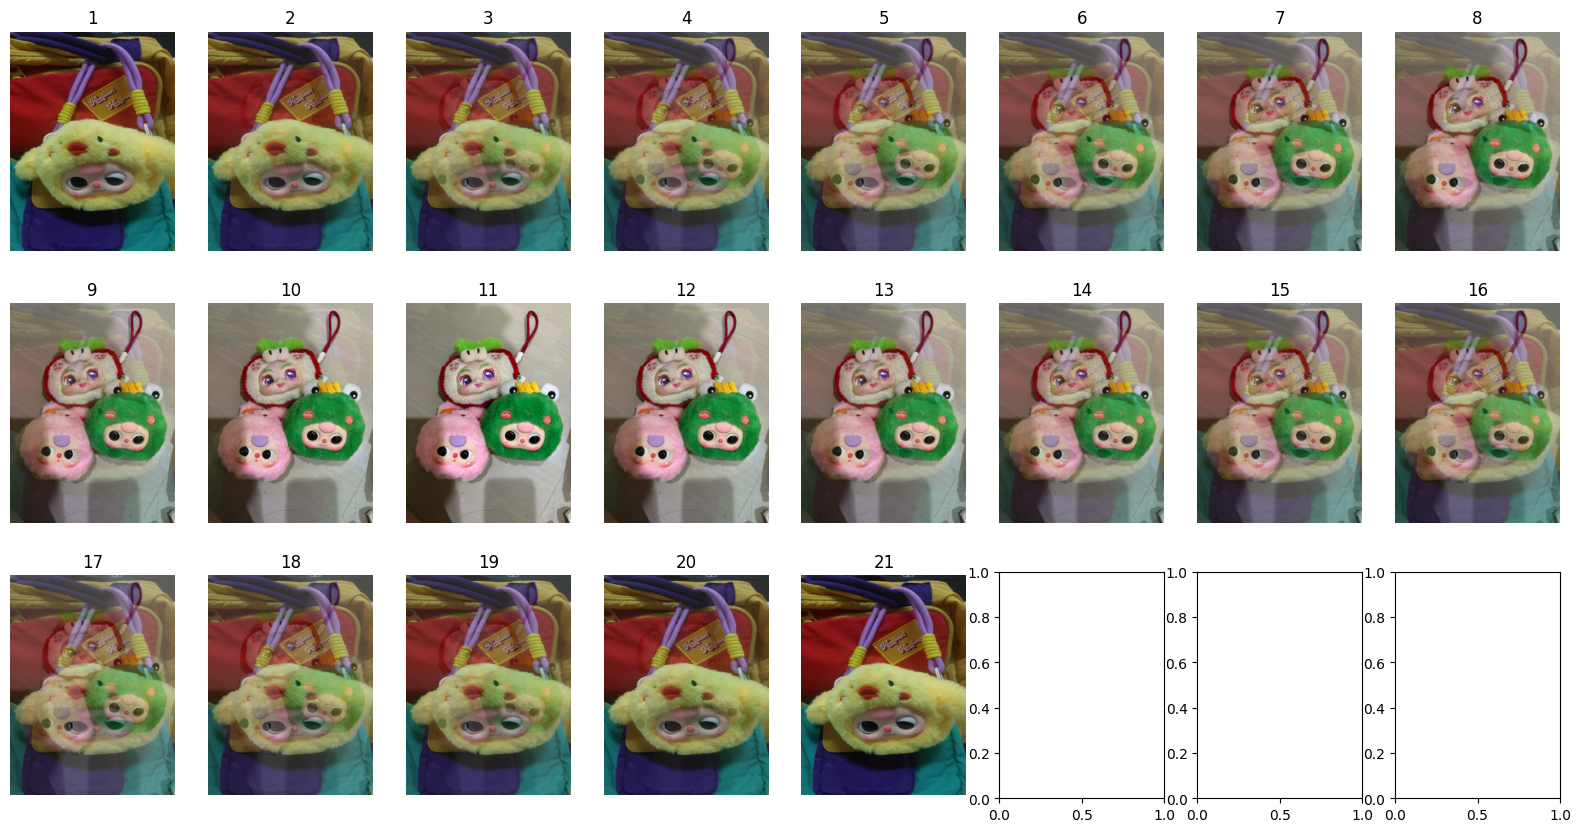

In [15]:
## Image addition
### START CODE HERE ###
def img_addition(img1, img2, w1, w2):
  new_img = (img1*w1) + (img2*w2)
  return new_img.astype("uint8")

image_path1 = '/content/babythreeAndKimmon.jpg'
image_path2 = '/content/yellowThree.jpg'

img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)

# BGR -> RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img2 = img2_resized

# total frames from image additiion
frames = []

# [0 -> 1], [1 -> 0] (20++ step)
steps, w = 22, 0
for i in range(steps):
  if i < 10 :
    result_img = img_addition(img1, img2, w/10, np.round(1-(w/10), 1))
    frames.append(result_img)
    w +=1
  elif i > 10 :
    result_img = img_addition(img1, img2, w/10, np.round(1-(w/10), 1))
    frames.append(result_img)
    # print(w/10, np.round(1-(w/10), 1))
    w-=1
print(10//3)
# display image
fig, axs = plt.subplots(3, (np.round(len(frames)/3)+1).astype(np.uint8), figsize = (20,10))
row = 3
col = (np.round(len(frames)/3)+1).astype(np.uint8)
print(len(frames))
for i in range(len(frames)):
  axs[i//col, i%(col)].imshow(frames[i])
  axs[i//col, i%(col)].set_title(f"{i+1}")
  axs[i//col, i%(col)].axis('off')
plt.show()
### END CODE HERE ###

In [16]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):

    # width * height
    size = (image_array[0].shape[1], image_array[0].shape[0])

    # video encoding
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, size)

    for image in image_array:

      img_cv = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      out.write(img_cv)
    out.release()

# create output folder
output_folder = "lab1_2"
os.makedirs(output_folder, exist_ok=True)

# set output file path
output_file = os.path.join(output_folder, "output_image_add.mp4")

# pass frames_img_addition and output file path to function
write_images_to_video(frames, output_file, frame_rate=15)

# ### END CODE HERE ###

In [17]:
## animation

### START CODE HERE ###
%%capture
fig = plt.figure()
vdos = []
for frame in frames:
  vdo = [plt.imshow(frame, animated=True)]
  vdos.append(vdo)
ani = animation.ArtistAnimation(fig, vdos, interval=1000/15, blit=True, repeat_delay=1000)
plt.axis('off')
### END CODE HERE ###

In [18]:
display(HTML(ani.to_jshtml()))

Output hidden; open in https://colab.research.google.com to view.

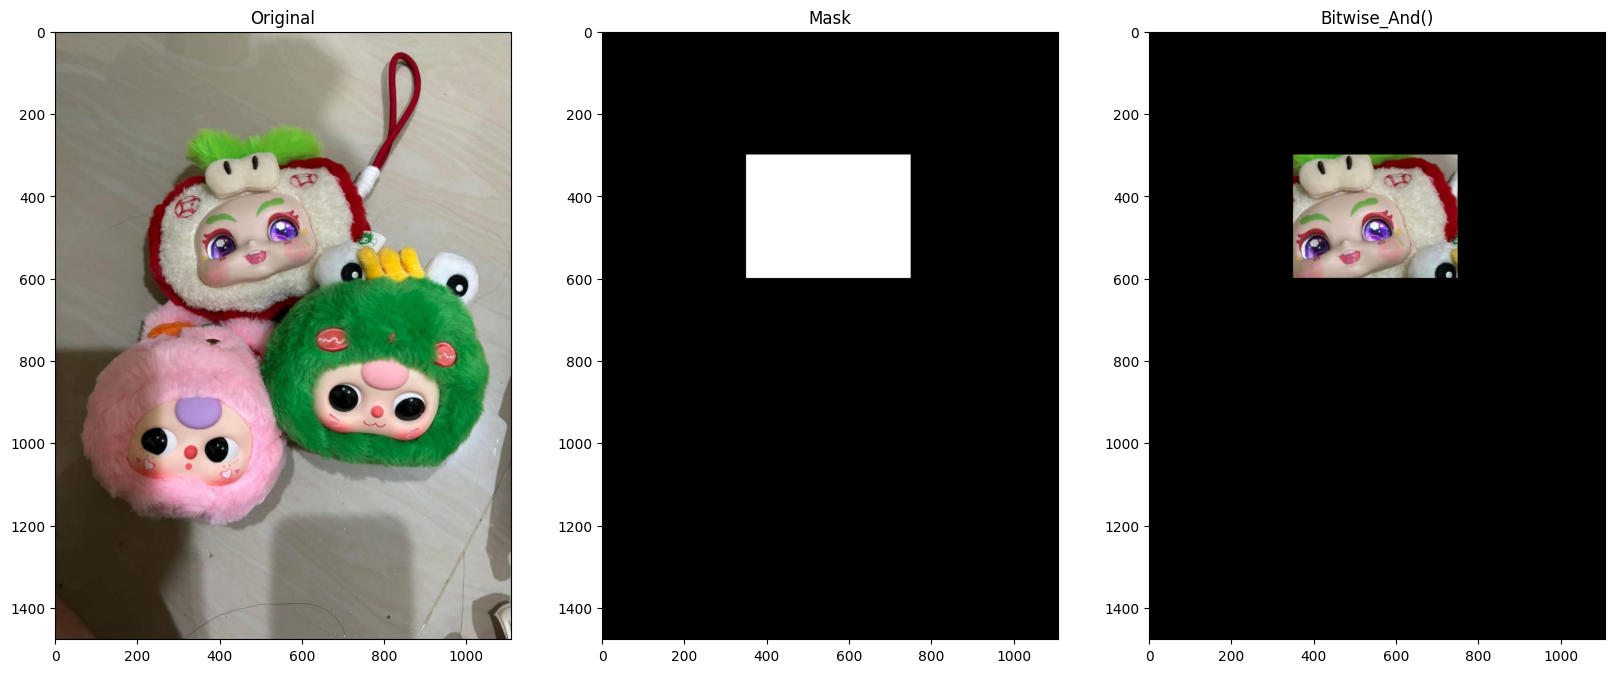

In [19]:
### START CODE HERE ###
def create_image_mask(height, width, ori_x, ori_y, size_x = 300, size_y = 400):

    # create bit 0 (black)
    image_mask = np.zeros((height, width), dtype=np.uint8)
    # create bit 1 (white)
    image_mask[ori_x:ori_x+size_x, ori_y:ori_y+size_y] = 255
    return image_mask

# import image
image = cv2.imread(image_path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# create mask
height, width = img.shape[0], img.shape[1]

# origin point of mask
x, y = 300, 350
mask = create_image_mask(height, width, x, y)

# bitwise_and
bitwise_and_result = cv2.bitwise_and(img, img, mask = mask)

# display
fig, axs = plt.subplots(1, 3, figsize = (20,10))
axs[0].imshow(img)
axs[0].set_title('Original')

axs[1].imshow(mask, cmap = 'gray')
axs[1].set_title('Mask')

axs[2].imshow(bitwise_and_result)
axs[2].set_title('Bitwise_And()')

plt.show()
### END CODE HERE ###